### Package Imports

In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

### Pulling in Data

In [2]:
# Pulling in the tickers and economic predicators we're interested in (Taiwan ETF, S&P 500, Gold, US Tech ETF, etc.)
tickers = ["EWT",'^GSPC','^N225','IYW','EXSA.MI','TWDUSD=X','CL=F','GC=F','SI=F','HG=F']

# Get the last business day to pull the most recent data
today = pd.Timestamp.now().normalize() # get today's date
last_business_day = today - BDay(1) # subtract one business day from today's date
lastbd = last_business_day.strftime('%Y-%m-%d') # format the date as yyyy-mm-dd


# get data for the variable tickers
df = yf.download(tickers,
                 start='2009-01-01',
                 end=lastbd,
                 progress=False)

# Dropping missing vals
df = df['Adj Close'].dropna()
df.head(5)

,CL=F,EWT,EXSA.MI,GC=F,HG=F,IYW,SI=F,TWDUSD=X,^GSPC,^N225
Date,,,,,,,,,,
2009-01-05,48.810001,9.536023,21.010000,857.200012,1.4420,8.237680,11.245,0.030161,927.450012,9043.120117
2009-01-06,48.580002,9.634460,21.600000,865.400024,1.5660,8.462852,11.420,0.030262,934.700012,9080.839844
2009-01-07,42.630001,9.412978,21.600000,841.099976,1.4945,8.179716,11.080,0.030234,906.650024,9239.240234
2009-01-08,41.700001,9.154583,21.600000,853.900024,1.4630,8.230992,11.072,0.030184,909.729980,8876.419922
2009-01-09,40.830002,8.797751,21.129999,854.299988,1.5455,8.025886,11.295,0.030111,890.349976,8836.799805


### Forecasting Predicator Variables Individually

In [3]:
df.tail()
## Just as a heads up CL=F is Oil, EWT is iShares MSCI Taiwan ETF, EXSA.MI is iShares STOXX Europe 600 UCITS ETF, GC=F is Gold, HG=F is Copper
## iShares U.S. Technology ETF (IYW), SI = F is Silver, USD/TWD (TWDUSD=X), S&P 500, Nikkei 225

,CL=F,EWT,EXSA.MI,GC=F,HG=F,IYW,SI=F,TWDUSD=X,^GSPC,^N225
Date,,,,,,,,,,
2023-03-10,76.680000,43.490002,44.939999,1862.000000,4.0455,82.669998,20.375000,0.032453,3861.590088,28143.970703
2023-03-13,74.800003,43.849998,43.840000,1911.699951,4.0695,83.250000,21.792999,0.032437,3855.760010,27832.960938
2023-03-14,71.330002,43.939999,44.445000,1906.199951,4.0105,85.389999,21.929001,0.032835,3919.290039,27222.039062
2023-03-15,67.610001,43.029999,43.055000,1926.599976,3.8565,85.769997,21.774000,0.032917,3891.929932,27229.480469
2023-03-16,68.349998,43.759998,43.665001,1919.000000,3.8855,88.540001,21.587999,0.032765,3960.280029,27010.609375


In [4]:
# Creating a dataframe Oil
Oil = pd.DataFrame()
Oil['date'] = df.index
Oil['CL=F'] = df['CL=F'].values
Oil = Oil.rename(columns={"CL=F" :"Oil"}).set_index('date')
Oil.tail()


,Oil
date,
2023-03-10,76.680000
2023-03-13,74.800003
2023-03-14,71.330002
2023-03-15,67.610001
2023-03-16,68.349998


In [5]:
# Creating a dataframe Gold
Gold = pd.DataFrame()
Gold['date'] = df.index
Gold['GC=F'] = df['GC=F'].values
Gold = Gold.rename(columns={"GC=F" :"Gold"}).set_index('date')
Gold.tail()

,Gold
date,
2023-03-10,1862.000000
2023-03-13,1911.699951
2023-03-14,1906.199951
2023-03-15,1926.599976
2023-03-16,1919.000000


In [6]:
# Creating a dataframe Copper
Copper = pd.DataFrame()
Copper['date'] = df.index
Copper['HG=F'] = df['HG=F'].values
Copper = Copper.rename(columns={"HG=F" :"Copper"}).set_index('date')
Copper.tail()

,Copper
date,
2023-03-10,4.0455
2023-03-13,4.0695
2023-03-14,4.0105
2023-03-15,3.8565
2023-03-16,3.8855


In [7]:
# Creating a dataframe Silver
Silver = pd.DataFrame()
Silver['date'] = df.index
Silver['SI=F'] = df['SI=F'].values
Silver = Silver.rename(columns={"SI=F" :"Silver"}).set_index('date')
Silver.tail()

,Silver
date,
2023-03-10,20.375000
2023-03-13,21.792999
2023-03-14,21.929001
2023-03-15,21.774000
2023-03-16,21.587999


<Axes: xlabel='date'>

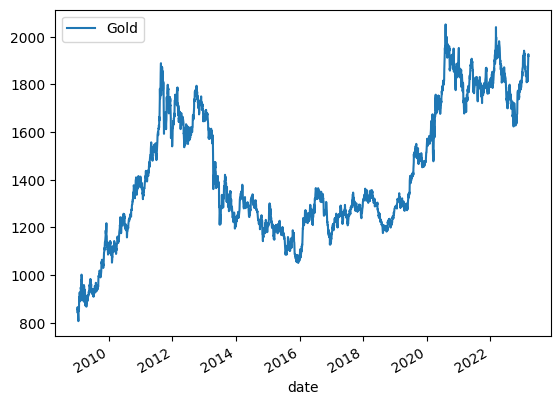

In [8]:
Gold.plot()

In [9]:
Gold.head(5)

,Gold
date,
2009-01-05,857.200012
2009-01-06,865.400024
2009-01-07,841.099976
2009-01-08,853.900024
2009-01-09,854.299988


In [10]:
## Split data to train and test
train = Gold['2009-01-05':'2021-12-31'] #
test = Gold['2022-01-01':]
print(f'Instances in train: {train.shape[0]}')
print(f'Instances in train: {test.shape[0]}')

Instances in train: 3015
Instances in train: 281


In [11]:
# Scaling data to put it in NN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scaling the train and tet data 
scaler.fit(train)  
scaled_gtrain = scaler.transform(train)
scaled_gtest = scaler.transform(test)

In [12]:
# Create sequences and labels for Train 
seq_len = 60
sequences_tr = []
labels_tr = []
for i in range(seq_len, len(scaled_gtrain)):
    sequences_tr.append(scaled_gtrain[i-seq_len:i])
    labels_tr.append(scaled_gtrain[i])

In [13]:
# Create sequences and labels for Test
seq_len = 60
sequences_ts = []
labels_ts = []
for i in range(seq_len, len(scaled_gtest)):
    sequences_ts.append(scaled_gtest[i-seq_len:i])
    labels_ts.append(scaled_gtest[i])

In [14]:
# Convert to numpy arrays train
x_train = np.array(sequences_tr)
y_train = np.array(labels_tr)

In [15]:
# Convert to numpy arrays test
x_test = np.array(sequences_ts)
y_test = np.array(labels_ts)

In [16]:
# training data based on the sequence window
print(f'Train - Seq_window: {train.shape[0] - seq_len}')
print(f'The above is equal to {x_train.shape[0]}')
# testing data based on the sequence window
print(f'Test - Seq_window: {test.shape[0] - seq_len}')
print(f'The above is equal to {x_test.shape[0]}')

Train - Seq_window: 2955
The above is equal to 2955
Test - Seq_window: 221
The above is equal to 221


In [27]:
# Set random seed for reproducibility
import tensorflow as tf
np.random.seed(8)
tf.random.set_seed(8)

In [28]:
# Just try with additonal layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(units=64, input_shape=(x_train.shape[1], x_train.shape[2]), activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='linear')
])

In [29]:
# Compile model
model.compile(optimizer='adam', loss='mse')

In [30]:
# Train model
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
93/93 [==============================] - 6s 37ms/step - loss: 0.0388
Epoch 2/100
93/93 [==============================] - 3s 35ms/step - loss: 0.0071
Epoch 3/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0064
Epoch 4/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0055
Epoch 5/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0053
Epoch 6/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0043
Epoch 7/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0042
Epoch 8/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0041
Epoch 9/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0040
Epoch 10/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0035
Epoch 11/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0036
Epoch 12/100
93/93 [==============================] - 3s 34ms/step - loss: 0.0032
Epoch 13/100
93/93 [=====

In [31]:
# Make predictions
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 11ms/step


In [32]:
# Inverse scaling on predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

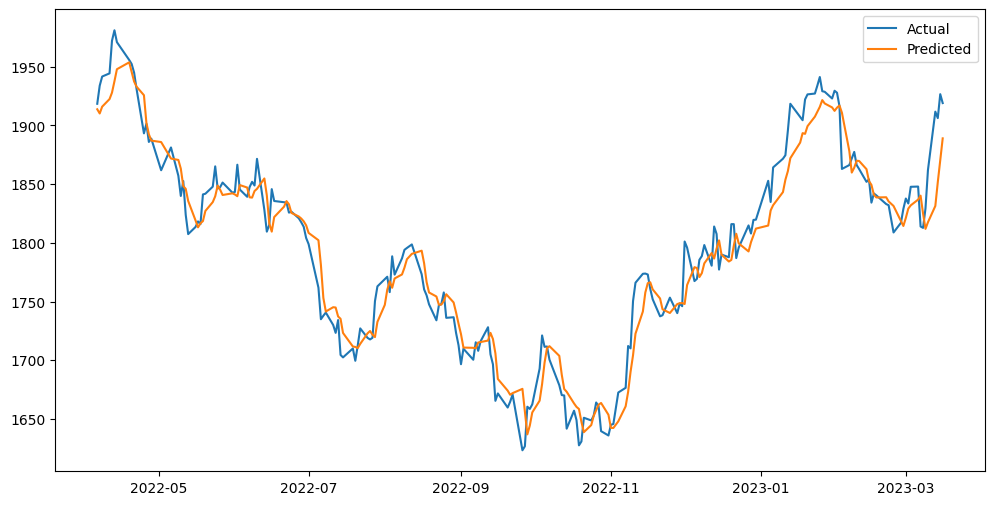

In [33]:
# Plot predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test_inv):], y_test_inv, label='Actual')
plt.plot(df.index[-len(y_pred_inv):], y_pred_inv, label='Predicted')
plt.legend()
plt.show()


In [34]:
# Confirmation of start date 
df.index[-len(y_pred_inv):]
df.index[-len(y_test_inv):]

DatetimeIndex(['2022-04-06', '2022-04-07', '2022-04-08', '2022-04-11',
               '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-19',
               '2022-04-20', '2022-04-21',
               ...
               '2023-03-03', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-13', '2023-03-14',
               '2023-03-15', '2023-03-16'],
              dtype='datetime64[ns]', name='Date', length=221, freq=None)

In [35]:
# Forecast 50 days into the future
future_dates = pd.date_range(start='20230310', periods=50, freq='D')
last_seq = x_test[-1].reshape(1, seq_len, 1)
forecast = []
for i in range(len(future_dates)):
    next_pred = model.predict(last_seq)
    forecast.append(next_pred[0][0])
    last_seq = np.append(last_seq[:,1:,:], [[next_pred[0]]], axis=1)

1/1 [==============================] - 0s 26ms/step


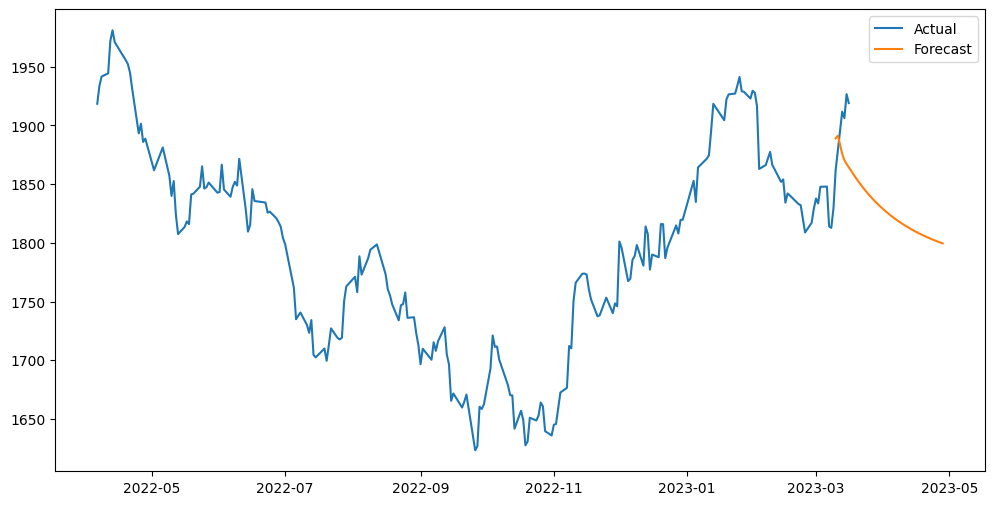

In [36]:
# Rand 1
# Inverse scaling on forecast
forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test_inv):], y_test_inv, label='Actual')
plt.plot(future_dates, forecast_inv, label='Forecast')
plt.legend()
plt.show()

#### End